In [ ]:
SEABORN ????

Advanced visualization
===

Data science is a relatively new profession which is growing rapidly world-wide with many employment opportunities in the information age which we find ourselves in. Chemical Engineers have been "Data Scientists" for decades, even before there were any computers around. Just be grateful you don't have to find Nusselt number correlations for flow across tube banks using a slide rule and some graphing paper!! 

At its heart, data science involves taking large quantities of data and using it to come to clear and useful conclusions. This can be anything: such as linking [life expectancy to per capita earnings](https://www.youtube.com/watch?v=jbkSRLYSojo) or predicting stock market trends based on economic indicators. Chemical Engineers find and use such correlations without even thinking about it: ever thought about how the expression for pipe friction factor based on wall roughness was developed? Ever considered that every time you plot log of the reaction rate versus the inverse of temperature, you are applying a model proposed by a guy called Svante Arrhenius in 1889? Relationships are at the core of any process, cause and effect, it is your job to find these connections and use them to make industrial processing faster, better, cheaper and safer!

To do this effectively requires four things: a question to be answered, sensible data, critical thinking and a few nifty tools! Before starting any data analysis be sure you know what the question is. If you don't know what you are looking for, you are NOT going to find it, no matter how hard you look. Never under estimate the requirement of sensible data. It is easy to come to conclusions regarding that temperature you measured and what influenced it. Things ALWAYS influence each other, if you look hard enough you can find correlations in the most unexpected places. If, however, you want the correlation between heating rate and sample temperature but you measured the air temperature, the information is useless.

**This cannot be stressed enough:** if you find something that doesn't make sense, DO NOT accept it and find worthless correlations. Go back to the experiment or instrument and think about what could have gone wrong, check the connections, meditate on what happened during the test. Most importantly do not forget the fundamental principles you have spent so much time learning so hard: energy and mass cannot be created or destroyed, heat flows from hot to cold, the vapour pressure of a fluid is related to its temperature, you can NOT control the flow rate in a pipe twice by placing two valves in the line... etc. 

Critical thinking should always be applied, both when considering your data and finding correlations. When in doubt test it again and again and again... Unfortunately we don't have a tool that can do our thinking for us ... thankfully, else finding a job might be impossible! For many tasks tools already exist, a quick Google search will give you an indication of what is available. Getting them to work correctly is another matter entirely. This is the reason for this tutorial: we will demonstrate techniques that will enable you to rapidly solve some of the easier [data munging](https://en.wikipedia.org/wiki/Data_wrangling/) problems and quickly move on to finding that mind-blowing breakthrough that will change the world!

Data set selection
===
The data sets and techniques considered here are mainly based on the types commonly encountered in lab experiments, however the tools can be applied to any information provided it is placed in the correct format. Typically in our lab the data acquisition equipment will be gathering data from a number of unrelated experiments all running at different times. Consider the real data set shown below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

For this tutorial we use *notebook* as opposed to *inline* in the basic tutorial, this enables interactivity with the plot.

<IPython.core.display.Javascript object>


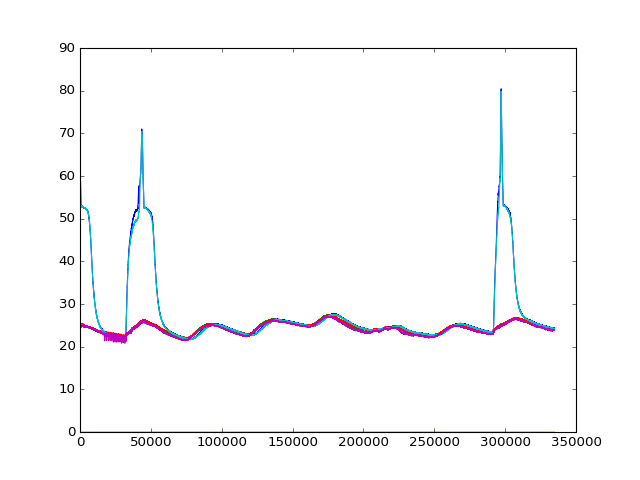

In [2]:
data = np.genfromtxt('data_PCM.txt', delimiter=",")
plt.figure()
plt.plot(data[:,1:])
plt.show()

The data set contains six different temperature readings, from different experiments over a period of seven days, sampled every two seconds. Imagine importing this into Excel! The data actually contains the information for three different experimental runs which we would like to examine. What we need is a tool that will allow us to quickly select the signals we are interested in and then slice this data into the three different runs to end up with three sets to compare. Luckily for you this module has already been developed in our group, it is called DataTools. 

**NOTE** for this to work correctly you must download the notebook and open it in the Jupyter Notebook program, not the online viewer.

In [3]:
import DataTools as DT

<IPython.core.display.Javascript object>


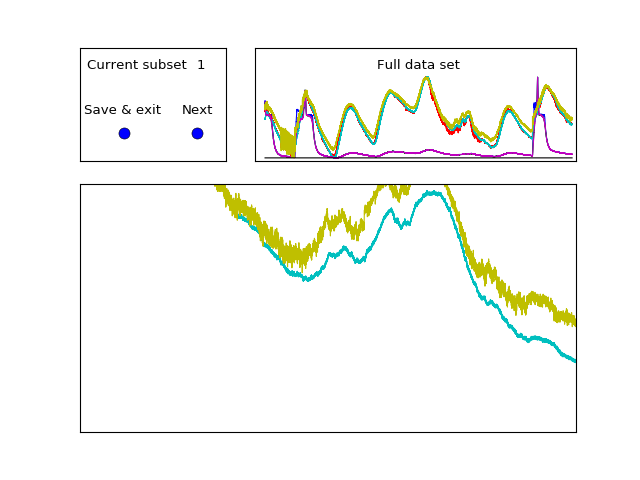

In [4]:
filename = 'data_PCM.txt'
DT.dataselector(filename)

These plots are fully interactive, you can move them around using the Pan button (the crossed arrows) and you can zoom in on specific regions using the Zoom button (square box). Click on the button again to stop the action. If you click on a specific plot in the "Full data set" window, it is passed to the "Selected subset" window. If you clicked on an incorrect data set, simply click on it again in the "Selected subset" window to remove it. When you are done click the blue button under "Save & Exit". This automatically creates a new file from the original with the original filename plus the extension \_Sn, where *n* is the number of the data subset, usually 1. If you want to make more than one subset select the first, click "Next" and select the new data set. You'll the the subset number increases and when you click "Save & exit" you'll find all your data sets automatically created. Once you click "Save & exit" it may take some time to write the data to the new files, once it is done the plot will no longer be interactive.

Notice that all the plots have been scaled to lie between 0 and 1 (normalized) and the y-axis is simply the index. Once you are done the original data (unscaled) is written to the file. If a prior file with the same name exists it will be overwritten.

Now that we have the signals we are interested in we can slice it up into the respective experiments. Remember to use the new subset file. This is done using???????

<IPython.core.display.Javascript object>


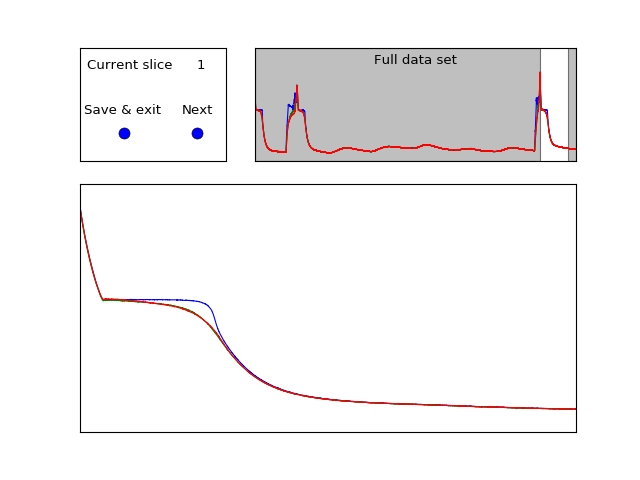

In [5]:
filename = 'data_PCM_S1.txt'
DT.dataslicer(filename)

The first two clicks will set the left and right initial limits, in that sequence. This can only be done in the "Full data set" window. Once these limits have been set they can be refined to a narrower range by clicking in either window. The limit will automatically be moved from whichever side is closest to the point where you clicked. If the range has been made too small, clicking anywhere in the gray zone will open it up again to that point. If you need to move either the left or right limit a distance larger than half the current plot, do this sequentially by clicking just to the left or right of the center of the range repeatedly.

In this case it is not recommended to use the zoom and pan functions, the tool will automatically zoom in by scaling the selected data to its current maximum and minimum value.

In general, it may be convenient to reverse the sequence of selection and slicing or even repeating one more than once, this depends on the specific data set. 